In [1]:
from scipy.optimize import fsolve
from math import exp
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def f1_hookean(B,*data):
    # This function is used for constant lambda-z
    A, Ri, beta, Vbar,p = data
    #eq = p+(1/2)*A*(math.log(A*Ri**2)+(A+B)**(-1)*(B+A*beta**2)**(-1)*(A*B+(-1)*A*B*beta**2+(-1)*(B**2+A**2*beta**2+A*B*(1+beta**2))*math.log((A+B)*Ri**2)+(-1)*(B**2+A**2*beta**2+A*B*(1+beta**2))*math.log(A*beta**2*Ri**2)+A*B*math.log((B+A*beta**2)*Ri**2)+B**2*math.log((B+A*beta**2)*Ri**2)+A**2*beta**2*math.log((B+A*beta**2)*Ri**2)+A*B*beta**2*math.log((B+A*beta**2)*Ri**2)+((-1)+beta)**3*(1+beta)*Vbar**2*math.log(((A+B)*Ri**2)**(-1/2)*((B+A*beta**2)*Ri**2)**(1/2))**(-2)))
    eq = (A*Ri**2+B*Ri**2)**(-1)*(A**2*Ri**2+(Ri+(-1)*beta*Ri)**2*Vbar**2*math.log((A*Ri**2+B*Ri**2)**(-1/2)*(B*Ri**2+A*beta**2*Ri**2)**(1/2))**(-2))+(-1)*(B*Ri**2+A*beta**2*Ri**2)**(-1)*(A**2*beta**2*Ri**2+(Ri+(-1)*beta*Ri)**2*Vbar**2*math.log((A*Ri**2+B*Ri**2)**(-1/2)*(B*Ri**2+A*beta**2*Ri**2)**(1/2))**(-2))+(-1/2)*(A*Ri**2+B*Ri**2)**(-1)*((-1)*A*(B*Ri**2+(A*Ri**2+B*Ri**2)*math.log(A*Ri**2))+2*A*(A*Ri**2+B*Ri**2)*math.log((A*Ri**2+B*Ri**2)**(1/2))+(Ri+(-1)*beta*Ri)**2*Vbar**2*math.log((A*Ri**2+B*Ri**2)**(-1/2)*(B*Ri**2+A*beta**2*Ri**2)**(1/2))**(-2))+(1/2)*(B*Ri**2+A*beta**2*Ri**2)**(-1)*((-1)*A*(B*Ri**2+(B*Ri**2+A*beta**2*Ri**2)*math.log(A*beta**2*Ri**2))+2*A*(B*Ri**2+A*beta**2*Ri**2)*math.log((B*Ri**2+A*beta**2*Ri**2)**(1/2))+(Ri+(-1)*beta*Ri)**2*Vbar**2*math.log((A*Ri**2+B*Ri**2)**(-1/2)*(B*Ri**2+A*beta**2*Ri**2)**(1/2))**(-2)) + p
    return eq

1.5


Text(0.5, 1.0, 'Fixed Tube')

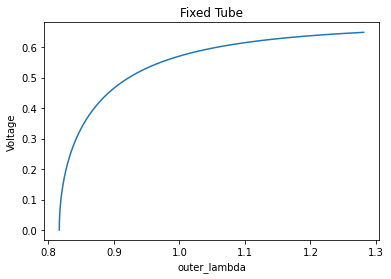

In [8]:
B_store = []
V_store = []
A_store = []
outer_lambda = []
co = []

Ri = 10
beta = 1.95
Ro = beta*Ri
A = 2/3
lambdaz = 1/A
print(lambdaz)
B_guess = 0.001 

p = 0

start = 0
end = 0.65

step_size = 0.001

for Vbar in np.arange(start, end, step_size):
    V_store.append(Vbar)
    data = (A,Ri, beta, Vbar,p)
    B = fsolve(f1_hookean, [B_guess], args=data)
    B_store.append(B[0])
    B = B_store[-1]
    A_store.append(A)
    outer_lambda.append(math.sqrt(A_store[-1]*beta**2+B_store[-1])/beta)
    #co_cal = (1/2)*(B+A*beta**2)**(-1)*(A*(B+2*A*beta**2+(B+A*beta**2)*math.log(A*beta**2*Ri**2)+(-1)*(B+A*beta**2)*math.log((B+A*beta**2)*Ri**2))+((-1)+beta)**2*Vbar**2*math.log(((A+B)*Ri**2)**(-1/2)*((B+A*beta**2)*Ri**2)**(1/2))**(-2))
    co_cal = (B*Ri**2+A*Ro**2)**(-1)*(A**2*Ro**2+(Ri+(-1)*Ro)**2*Vbar**2*math.log((A*Ri**2+B*Ri**2)**(-1/2)*(B*Ri**2+A*Ro**2)**(1/2))**(-2))+(-1/2)*(B*Ri**2+A*Ro**2)**(-1)*((-1)*A*(B*Ri**2+(B*Ri**2+A*Ro**2)*math.log(A*Ro**2))+2*A*(B*Ri**2+A*Ro**2)*math.log((B*Ri**2+A*Ro**2)**(1/2))+(Ri+(-1)*Ro)**2*Vbar**2*math.log((A*Ri**2+B*Ri**2)**(-1/2)*(B*Ri**2+A*Ro**2)**(1/2))**(-2))   
    co.append(co_cal)
    B_guess = B
    

plt.plot(outer_lambda,V_store)
plt.xlabel('outer_lambda')
plt.ylabel('Voltage')
plt.title('Fixed Tube')

In [80]:
final = pd.DataFrame(list(zip(A_store, B_store, outer_lambda, V_store, co)),columns =['Normalised_A', 'Normalised_B', 'Outer Lambda', 'Voltage', 'co'])
final
s1 = "final_10mm_"
s2 = str(Ro)
s3 = "mm_lambdaz_"
s4 = str(lambdaz)
s5 = "_pressure_"
s6 = str(p)
s7 = ".xlsx"
print(s1+s2+s3+s4+s5+s6+s7)
final.to_excel(s1+s2+s3+s4+s5+s6+s7)

final_10mm_12.5mm_lambdaz_1.5_pressure_0.05.xlsx


In [ ]:
# (1/2)*(B+A*beta**2)**(-1)*(A*(B+2*A*beta**2+(B+A*beta**2)*math.log(A*beta**2*Ri**2)+(-1)*(B+A*beta**2)*math.log((B+A*beta**2)*Ri**2))+((-1)+beta)**2*Vbar**2*math.log(((A+B)*Ri**2)**(-1/2)*((B+A*beta**2)*Ri**2)**(1/2))**(-2))

In [ ]:
# (A*Ri**2+B*Ri**2)**(-1)*(A**2*Ri**2+(Ri+(-1)*beta*Ri)**2*Vbar**2*math.log((A*Ri**2+B*Ri**2)**(-1/2)*(B*Ri**2+A*beta**2*Ri**2)**(1/2))**(-2))+(-1)*(B*Ri**2+A*beta**2*Ri**2)**(-1)*(A**2*beta**2*Ri**2+(Ri+(-1)*beta*Ri)**2*Vbar**2*math.log((A*Ri**2+B*Ri**2)**(-1/2)*(B*Ri**2+A*beta**2*Ri**2)**(1/2))**(-2))+(-1/2)*(A*Ri**2+B*Ri**2)**(-1)*((-1)*A*(B*Ri**2+(A*Ri**2+B*Ri**2)*math.log(A*Ri**2))+2*A*(A*Ri**2+B*Ri**2)*math.log((A*Ri**2+B*Ri**2)**(1/2))+(Ri+(-1)*beta*Ri)**2*Vbar**2*math.log((A*Ri**2+B*Ri**2)**(-1/2)*(B*Ri**2+A*beta**2*Ri**2)**(1/2))**(-2))+(1/2)*(B*Ri**2+A*beta**2*Ri**2)**(-1)*((-1)*A*(B*Ri**2+(B*Ri**2+A*beta**2*Ri**2)*math.log(A*beta**2*Ri**2))+2*A*(B*Ri**2+A*beta**2*Ri**2)*math.log((B*Ri**2+A*beta**2*Ri**2)**(1/2))+(Ri+(-1)*beta*Ri)**2*Vbar**2*math.log((A*Ri**2+B*Ri**2)**(-1/2)*(B*Ri**2+A*beta**2*Ri**2)**(1/2))**(-2))